In [1]:
!pip3 install -q gym[atari]
!pip install -q autorom[accept-rom-license]




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install PyOpenGL
!pip install pyvirtualdisplay
!pip install PyOpenGL_accelerate



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install gym[atari]
!pip install ale-py


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip3 install gym==0.25.2 pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for skamine3: 


In [6]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup
#!pip3 install gym[atari]

  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
Using cached setuptools-75.6.0-py3-none-any.whl (1.2 MB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running egg_info
      creating /tmp/pip-pip-egg-info-d9r06y64/ez_setup.egg-info
      writing /tmp/pip-pip-egg-info-d9r06y64/ez_setup.egg-info/PKG-INFO
      writing dependency_links to /tmp/pip-pip-egg-info-d9r06y64/ez_setup.egg-info/dependency_links.txt
      writing top-level names to /tmp/pip-pip-egg-info-d9r06y64/ez_setup.egg-info/top_level.txt
      writing manifest file '/tmp/pip-pip-egg-info-d9r06y64/ez_setup.egg-info/SOURCES.txt'
      reading manifest file '/tmp/pip-pip-egg-info-d9r

In [ ]:
!pip3 install gym==0.25.2 pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for skamine3: 

In [1]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN
from config import *

import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

In [2]:
import gym

env = gym.make('ALE/Breakout-v5')
state = env.reset()
_, _, _, info = env.step(0)  # Take a no-op action
print("Info keys:", info.keys())


Info keys: dict_keys(['lives', 'episode_frame_number', 'frame_number'])


A.L.E: Arcade Learning Environment (version 0.7.5+db37282)
[Powered by Stella]
/home/skamine3/.local/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/skamine3/.local/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/skamine3/.local/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [3]:
def check_live(life, cur_life):
    return life > cur_life

def find_max_lives(env):
    env.reset()
    _, _, _, info = env.step(0)
    return info.get('lives', 0)  # Use 'lives' key


In [4]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

In [5]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

episode: 0   score: 0.0   memory length: 123   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.0
episode: 1   score: 0.0   memory length: 247   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 0.0
episode: 2   score: 1.0   memory length: 418   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 0.3333333333333333
episode: 3   score: 4.0   memory length: 696   epsilon: 1.0    steps: 278    lr: 0.0001     evaluation reward: 1.25
episode: 4   score: 1.0   memory length: 866   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.2
episode: 5   score: 0.0   memory length: 990   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.0
episode: 6   score: 1.0   memory length: 1142   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.0
episode: 7   score: 1.0   memory length: 1313   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.0
episode: 8   score: 1.0   memory length: 1483   epsilon: 1.0  

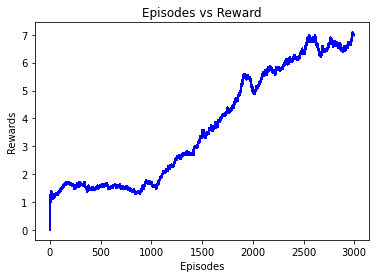

In [6]:
import os

# Ensure the directories exist
os.makedirs("save_graph", exist_ok=True)
os.makedirs("save_model", exist_ok=True)

rewards, episodes = [], []
best_eval_reward = 0

for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            # Updated: Expand input dimensions for get_action
            action = agent.get_action(np.expand_dims(np.float32(history[:4, :, :]), axis=0) / 255.)

        state = next_state
        next_state, reward, done, info = env.step(action + 1)

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state

        # Updated to handle 'lives' key instead of 'ale.lives'
        terminal_state = check_live(life, info.get('lives', life))
        life = info.get('lives', life)

        r = np.clip(reward, -1, 1)
        r = reward

        # Store the transition in memory
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)

        # Start training after random sample generation
        if frame >= train_frame:
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN
            if double_dqn and (frame % update_target_network_frequency) == 0:
                agent.update_target_net()

        score += reward
        history[:4, :, :] = history[1:, :, :]

        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards')
            pylab.title('Episodes vs Reward')
            pylab.savefig("save_graph/breakout_dqn.png")  # Save the graph in the correct directory

            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # Save the model if evaluation reward exceeds a threshold
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)

    # Early stopping condition
    if np.mean(evaluation_reward) >= 8:
        torch.save(agent.policy_net, "save_model/breakout_dqn.pth")
        pylab.savefig("save_graph/breakout_dqn.png")
        best_eval_reward = np.mean(evaluation_reward)
        break


In [11]:
torch.save(agent.policy_net, "./save_model/breakout_dqn_latest.pth")

In [12]:
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env=RecordVideo(env, './video', episode_trigger = lambda episode_number: True)
	  #env = Monitor(env, './video', force=True)
    return env

In [10]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
# agent.load_policy_net("./save_model/breakout_dqn.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.expand_dims(np.float32(history[:4, :, :]),axis=0) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['lives'])
        
    life = info['lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()

/home/skamine3/.local/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/skamine3/.local/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/skamine3/.local/lib/python3.9/site-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /scratch/skamine3/CS747_Assignment5/CS747_Assigment5/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/home/skamine3/.local/lib/python3.9/site-packages/gym/wrappers/moni